<a href="https://colab.research.google.com/github/andysingal/deep-learning/blob/main/Keras_API's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Keras and data retrieval in TensorFlow 2

You can import Keras using import tensorflow.keras. Keras has three main APIs:

- Sequential

- Functional

- Sub-classing

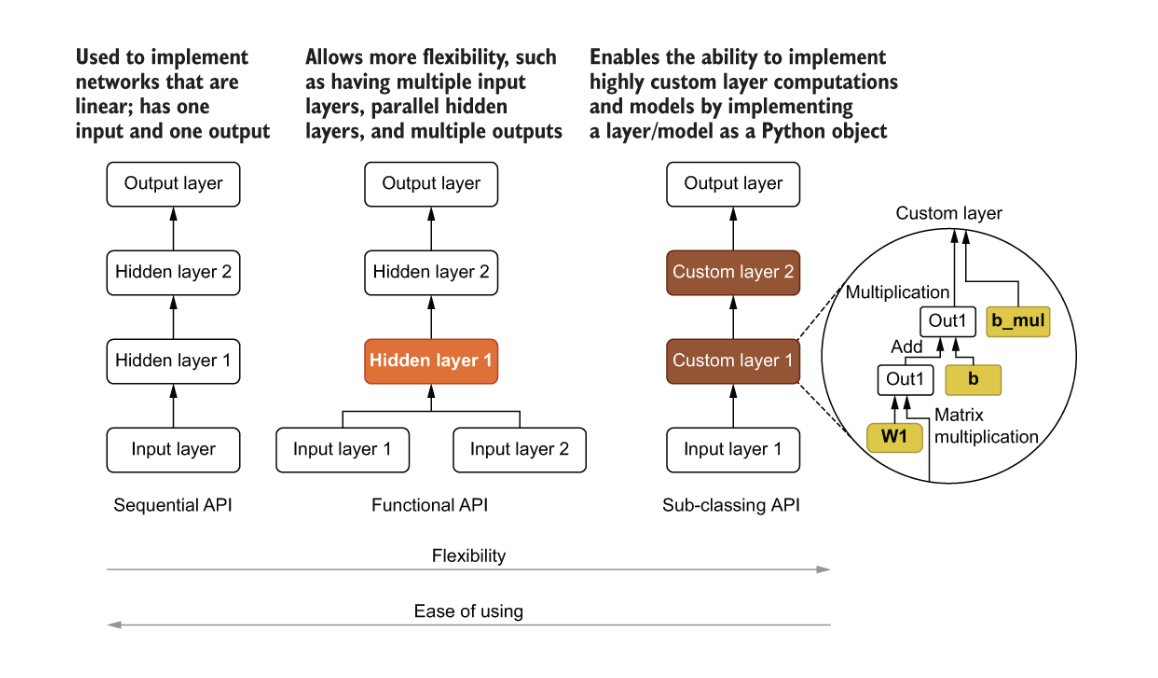

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import random
from sklearn.decomposition import PCA

from tensorflow.keras import layers

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import requests

# Fixing the seed to obtain consistent random values during multiple runs

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

import tensorflow.keras.backend as K

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

    
def fix_random_seed(seed):
    """ Setting the random seed of various libraries """
    try:
        np.random.seed(seed)
    except NameError:
        print("Warning: Numpy is not imported. Setting the seed for Numpy failed.")
    try:
        tf.random.set_seed(seed)
    except NameError:
        print("Warning: TensorFlow is not imported. Setting the seed for TensorFlow failed.")
    try:
        random.seed(seed)
    except NameError:
        print("Warning: random module is not imported. Setting the seed for random failed.")

# Fixing the random seed
fix_random_seed(4321)
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.12.0


In [2]:
# Section 3.1

import requests
import pandas as pd
import tensorflow as tf

# Retrieve the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(url)

with open('iris.data', 'wb') as f:
  f.write(r.content)

# Read the data in
iris_df = pd.read_csv('iris.data', header=None)

# Set the column names
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length', 'label']
print(iris_df.label.unique())

# Convert labels to integers
iris_df["label"] = iris_df["label"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Shuffle the data
iris_df = iris_df.sample(frac=1.0, random_state=4321)

# Normalize the features by subtracting the mean
x = iris_df[["sepal_length", "sepal_width", "petal_width", "petal_length"]]
x = x - x.mean(axis=0)

# Converting integer labels to one-hot vectors
y = tf.one_hot(iris_df["label"], depth=3)

iris_df.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepal_length,sepal_width,petal_width,petal_length,label
31,5.4,3.4,1.5,0.4,0
23,5.1,3.3,1.7,0.5,0
70,5.9,3.2,4.8,1.8,1
100,6.3,3.3,6.0,2.5,2
44,5.1,3.8,1.9,0.4,0


Shuffling the data is an important step: the data is in a very specific order, with each class appearing one after another. But you achieve the best results when data has been shuffled so that each batch presented to the network has a good mix of all classes found in the full data set. You can also see that we used a transformation on y (or labels), known as one-hot encoding.

#Sequential API
The Sequential API is the easiest to use. It can be used to define a simple model that has one input, one output and a sequence of intermediate layers in the middle.

Here we are defining a model with following layers.

A Dense layer with 32 nodes and relu activation
A Dense layer with 16 nodes and relu activation
A Dense layer with 3 nodes and softmax activation
Finally we train the model using a batch size of 64 and for 10 epochs.

In [5]:
def build_model(seed=42):
    K.clear_session()
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(x, y, batch_size=64, epochs=25)
    

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)
history_adam = build_and_train_model(optimizer)  # extra code

Epoch 1/25
3/3 [==============================] - 1s 7ms/step - loss: 1.0720 - accuracy: 0.3467
Epoch 2/25
3/3 [==============================] - 0s 4ms/step - loss: 1.0196 - accuracy: 0.3600
Epoch 3/25
3/3 [==============================] - 0s 3ms/step - loss: 0.9746 - accuracy: 0.3733
Epoch 4/25
3/3 [==============================] - 0s 3ms/step - loss: 0.9318 - accuracy: 0.3933
Epoch 5/25
3/3 [==============================] - 0s 3ms/step - loss: 0.8919 - accuracy: 0.4733
Epoch 6/25
3/3 [==============================] - 0s 3ms/step - loss: 0.8562 - accuracy: 0.5733
Epoch 7/25
3/3 [==============================] - 0s 3ms/step - loss: 0.8212 - accuracy: 0.6800
Epoch 8/25
3/3 [==============================] - 0s 3ms/step - loss: 0.7894 - accuracy: 0.7400
Epoch 9/25
3/3 [==============================] - 0s 3ms/step - loss: 0.7585 - accuracy: 0.7533
Epoch 10/25
3/3 [==============================] - 0s 5ms/step - loss: 0.7305 - accuracy: 0.7600
Epoch 11/25
3/3 [======================